In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE


In [5]:
data = pd.read_csv("threats.csv")
X = data.drop(["Threat"],axis =1)
Y = data['Threat']


## Removing Imbalance and Optimizing Dataset

In [6]:
model = DecisionTreeClassifier()
rfe_selector = RFE(estimator=model, n_features_to_select=20,step =10)
X_selected = rfe_selector.fit_transform(X, Y)

smote =SMOTE() 
X_resampled,Y_resampled = smote.fit_resample(X_selected,Y)

print("before resampling",Y.value_counts())
print("after resampling",Y_resampled.value_counts())
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled,Y_resampled,test_size=0.2, random_state=42)




before resampling 0    998092
1      1908
Name: Threat, dtype: int64
after resampling 0    998092
1    998092
Name: Threat, dtype: int64


In [7]:
model = DecisionTreeClassifier() # Creating a Decision Tree Claissifer
model.fit(X_train,Y_train) # Training the Decision Tree Classifier on the Training Dataset
model.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [8]:
predictions = model.predict(X_test)


## Plotting the decision tree

In [9]:
from sklearn import tree
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
tree.plot_tree(model, filled=True, class_names={0:'Benign',1:'Threat'}, rounded=True,fontsize = 9)
plt.show()

## Cross Validation using Stratified K-Fold

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kfold_validation=StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
results=cross_val_score(model,X_resampled,Y_resampled,cv=kfold_validation)
print(results)
print(results.mean())


[0.98525688 0.98540716 0.98495129 0.98519175 0.98483854]
0.9851291262275499


## Performance Evaluation

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,f1_score,matthews_corrcoef
print("accuracy score : " ,accuracy_score(Y_test, predictions),"\n")
print("confusion matrix:\n",confusion_matrix(Y_test, predictions, labels=[0,1]),"\n")

print("precision score: ",precision_score(Y_test, predictions),"\n")

print("recall : ",recall_score(Y_test, predictions),"\n")

print("f1 score:",f1_score(Y_test, predictions),"\n")

print("mathews correlation constant",matthews_corrcoef(Y_test, predictions),"\n")

print("summary:\n",classification_report(Y_test, predictions, target_names=['0', '1']),"\n")

accuracy score :  0.9860934733003204 

confusion matrix:
 [[195626   3851]
 [  1701 198059]] 

precision score:  0.980927145758011 

recall :  0.9914847817380857 

f1 score: 0.9861777080688127 

mathews correlation constant 0.9722431151860567 

summary:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    199477
           1       0.98      0.99      0.99    199760

    accuracy                           0.99    399237
   macro avg       0.99      0.99      0.99    399237
weighted avg       0.99      0.99      0.99    399237
 



## ROC Graph


ROC AOC SCORE 0.9886202369762609


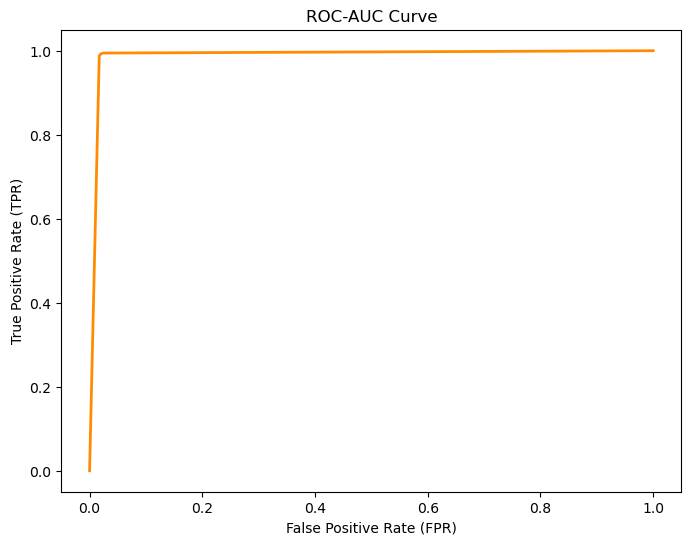

In [9]:
from sklearn.metrics import roc_curve, auc
y_probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc_score = auc(fpr, tpr)
print("ROC AOC SCORE",auc_score)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.show()
